<a href="https://colab.research.google.com/github/AnasBakr/Ml-projects-/blob/main/Medical_Cost_prediction_Regression_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# Conclusion
We have tried an endless count of models after the linear regression model none of them improved the accuracy except the **polynomial regression method**


---



# import dependencies

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge ,ElasticNet
from sklearn.preprocessing import LabelEncoder ,StandardScaler ,PolynomialFeatures



---

# Data preprocessing

In [195]:
data_set = pd.read_csv('/content/insurance.csv')

In [196]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [197]:
data_set.shape

(1338, 7)

In [198]:
data_set.duplicated().sum()

1

In [199]:
data_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [200]:
data_set.drop_duplicates(inplace=True)

In [201]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [202]:
#replacing the categories with numbers
le = LabelEncoder()
categorical_attr = ['sex', 'smoker', 'region' ]
data_set[categorical_attr] = data_set[categorical_attr].apply(le.fit_transform, axis=0)

In [203]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [204]:
data_set.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010




---


# Data visualization

# This plots shows us several things :-
* That **75%** of the people who are in our dataset has bmi below 35
* The **hieghst bills** cames to those who has their bmi between 30 and 45
* There are **No Correlation** between the bmi and the medical costs billed by health insurance
---








# There are no special thing about the age featuer , it doesnot correlate with the bill costs and most people in our data set are **below 51 years** old
---



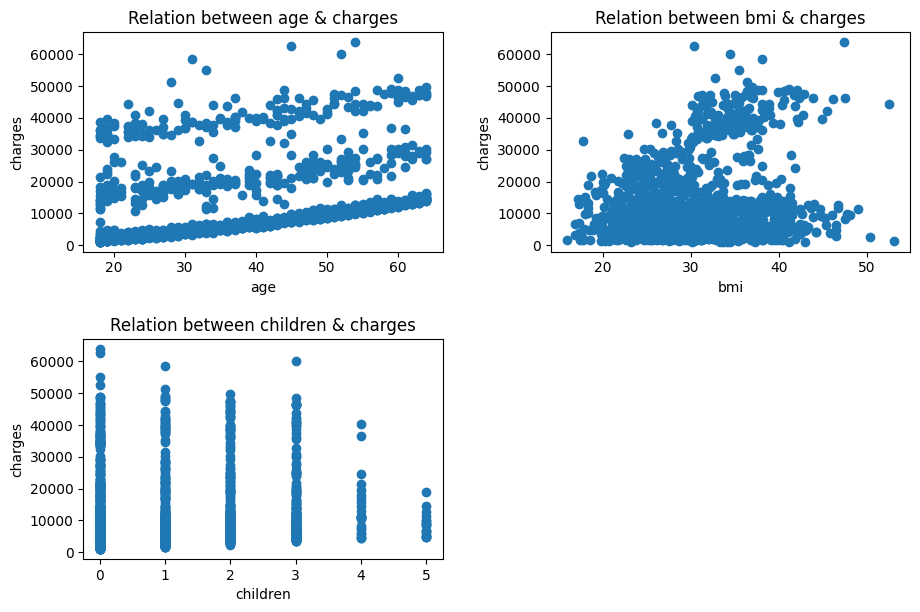

In [205]:
variables = ['age' ,'bmi' ,'children' ]
num_plots = len(variables)
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 12))
fig.tight_layout()
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(data_set[var], data_set['charges'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('charges')
    axs[row, col].set_title(f'Relation between {var} & charges')
for i in range(num_plots, num_rows * num_cols):
   fig.delaxes(axs.flatten()[i])
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()



---


There are **no corelation** between the (age ,bmi ,childeren number ) and the
amount of charges


---



In [206]:
#the count of types of categoril data
data = {
    'sex': data_set['sex'].value_counts(),
    'smoker': data_set['smoker'].value_counts(),
    'region': data_set['region'].value_counts()
}

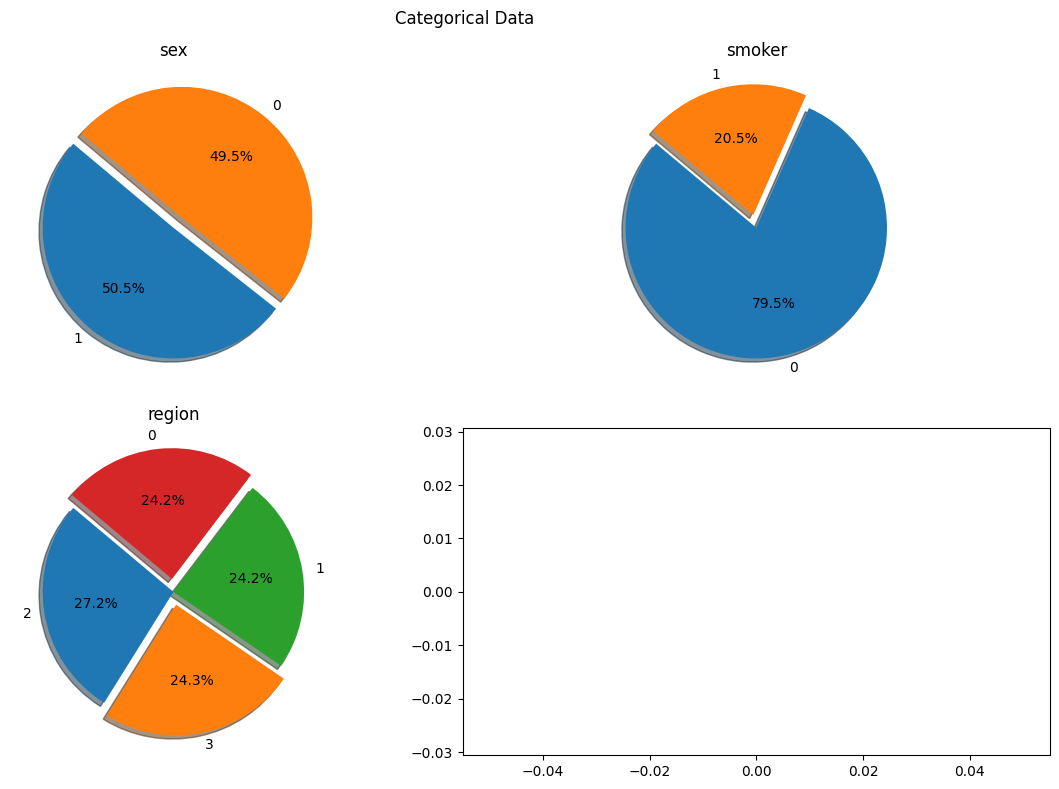

In [207]:
#Pie Charts for Categorical Data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Categorical Data')
explode1 = (0, 0.1)
explode2 = (0, 0.1, 0, 0.1)
for i, (column_name, values_array) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    categories = list(values_array.index)
    values = list(values_array)
    try:
      axs[row, col].pie(values, labels=categories,explode=explode1, autopct='%1.1f%%', startangle=140 ,shadow=True)
    except:
      axs[row, col].pie(values, labels=categories,explode=explode2, autopct='%1.1f%%', startangle=140 ,shadow=True)
    axs[row, col].set_title(column_name)
plt.axis('equal')
plt.tight_layout()
plt.show()



---


Every category seems virtually balanced except that the smokers is **way less than** non smokers


---



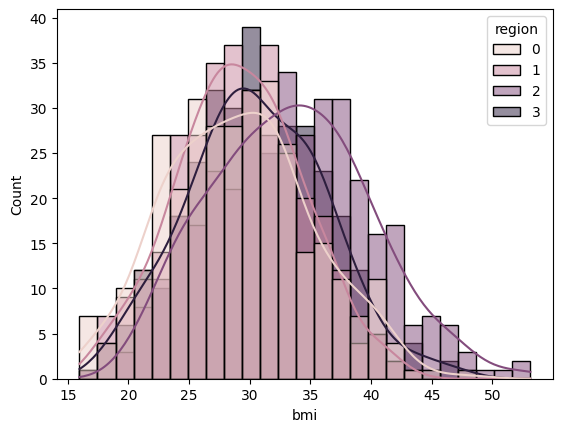

In [208]:
#title BMI distribution by region
sns.histplot(data=data_set, x="bmi", hue="region", kde=True);



---
Here is the distribution of Body mass index according to the region








---


<Axes: xlabel='charges', ylabel='Count'>

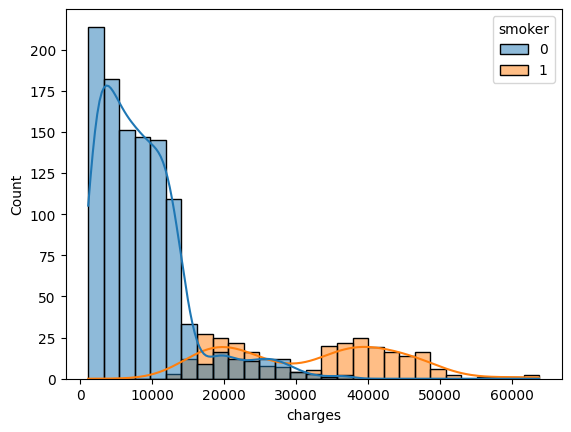

In [209]:
#title Distribution of Charges by Smoker Status
sns.histplot(data=data_set, x="charges", hue="smoker", kde=True)



---

Obviously here we see that the non smokers are charged **way less than** the smokers


---



<ipython-input-210-97c5698dd3d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_set, x='region', y='age', inner='box', palette='Dark2')


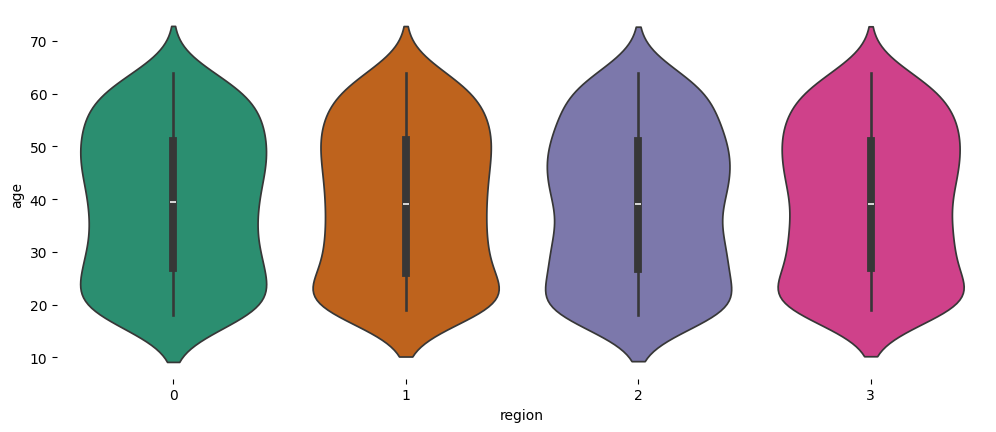

In [210]:
# title region vs age
figsize = (12, 1.2 * len(data_set['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_set, x='region', y='age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)



---
we are looking at the distribution of the regions according to the age
 and it is **balanced** for all the regions



---



In [211]:
correlation = data_set.corr()

<Axes: >

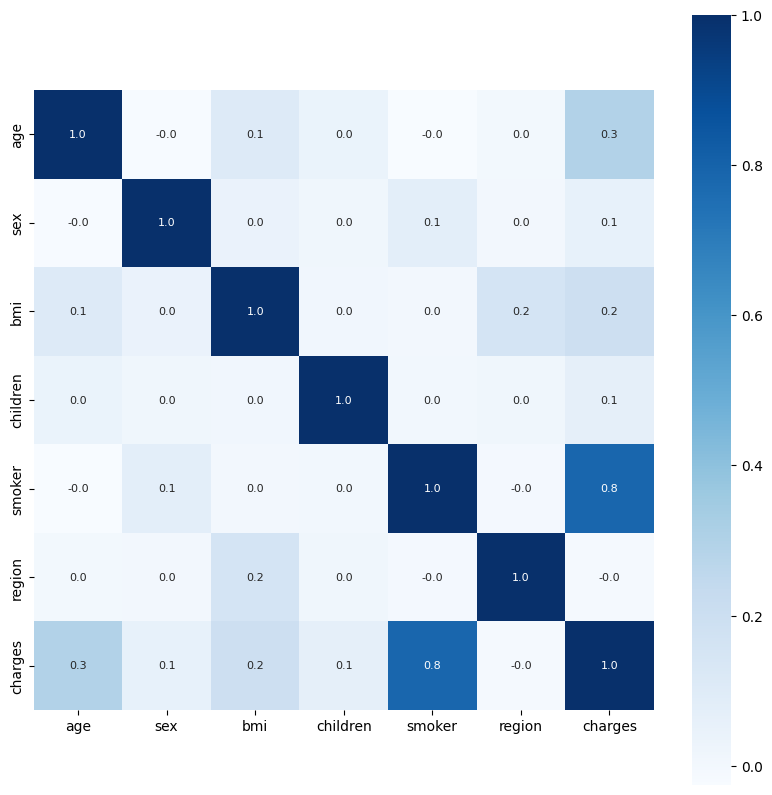

In [212]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')



---

As we mentioned earlier the smoking status is **highly correlated** with the charges amount and this heatmap shows that



---

# Model building

In [213]:
X = data_set.drop('charges' ,axis=1)
Y = data_set['charges']

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [215]:
# loading the model
model = LinearRegression()

In [216]:
# training the model with X_train
model.fit(X_train, Y_train)

LinearRegression()



---
# Model Evaluation


In [217]:
#testing in the traning data
training_data_prediction = model.predict(X_train)

In [218]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7586223702914746
Mean Absolute percentage Error :  0.4080822435175152


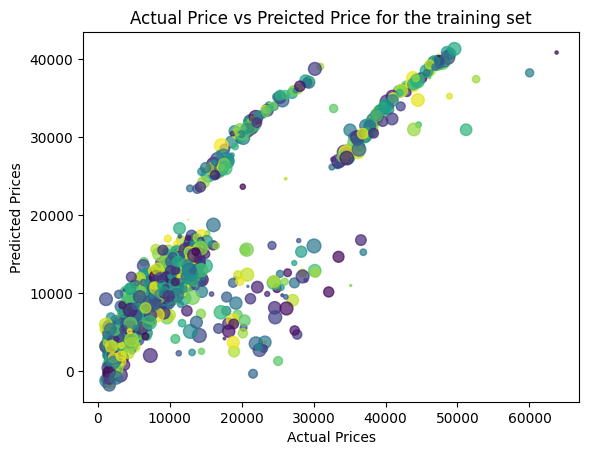

In [219]:
colors = np.random.rand(1069)
sizes = 100 * np.random.rand(1069)
plt.scatter(Y_train, training_data_prediction ,s= sizes ,c=colors, alpha=0.7, cmap='viridis')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price for the training set")
plt.show()



---


The scatterplot displays a moderately positive relationship


---



In [220]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [221]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7164204424900908
Mean Absolute percentage Error :  0.44627567114682587


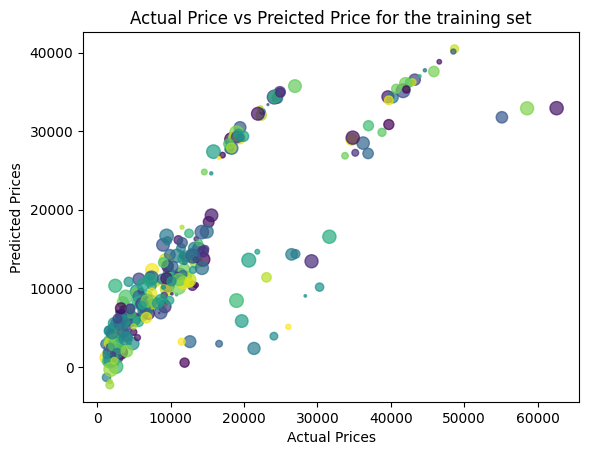

In [222]:
colors = np.random.rand(268)
sizes = 100 * np.random.rand(268)
plt.scatter(Y_test, test_data_prediction ,s=sizes ,c=colors, alpha=0.7, cmap='viridis')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price for the training set")
plt.show()



---


We can try to make the model accuracy better by trying another approaches to build this model



---

# Standardizeing the features

In [223]:
# define standard scaler
scaler = StandardScaler()

# transform data
X_Standardized = scaler.fit_transform(X)
X_Standardized = pd.DataFrame(X_Standardized, columns=['age', 'sex','bmi' ,'children' ,'smoker' ,'region'])
X_Standardized

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702,1.343163


In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Standardized, Y, test_size = 0.2, random_state=2)

In [225]:
# training the model with X_train
model.fit(X_train, Y_train)

LinearRegression()



---
 Model Evaluation


In [226]:
#testing in the traning data
training_data_prediction = model.predict(X_train)

In [227]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7586223702914745
Mean Absolute percentage Error :  0.4080822435175154


In [228]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [229]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7164204424900907
Mean Absolute percentage Error :  0.44627567114682587




---
This didnot improve the model  





---

# Polynomial Regression

In [230]:
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=2, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(X)

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split( poly_features, Y, test_size = 0.2, random_state=2)

In [232]:
# training the model with X_train
model.fit(X_train, Y_train)

LinearRegression()

In [233]:
#testing in the traning data
training_data_prediction = model.predict(X_train)

In [234]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.850055145034305
Mean Absolute percentage Error :  0.2793444554461311


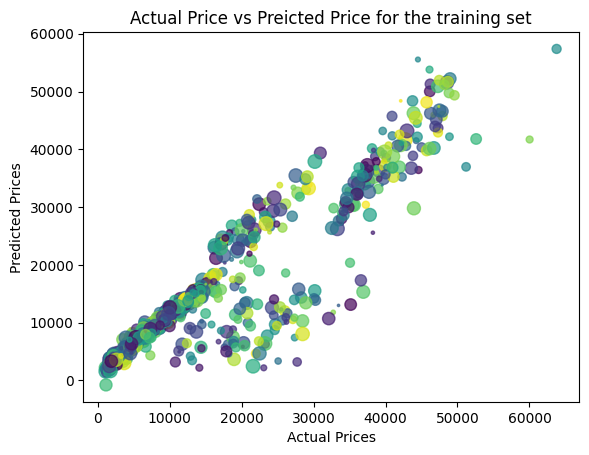

In [235]:
colors = np.random.rand(1069)
sizes = 100 * np.random.rand(1069)
plt.scatter(Y_train, training_data_prediction ,s= sizes ,c=colors, alpha=0.7, cmap='viridis')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price for the training set")
plt.show()

In [236]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [237]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.8279958951614403
Mean Absolute percentage Error :  0.29595705526005145


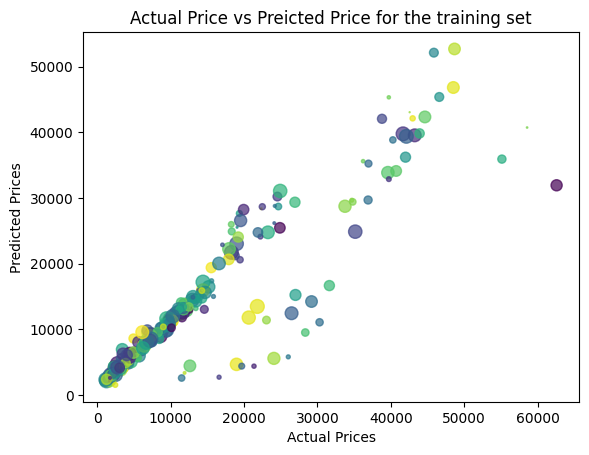

In [238]:
colors = np.random.rand(268)
sizes = 100 * np.random.rand(268)
plt.scatter(Y_test, test_data_prediction ,s=sizes ,c=colors, alpha=0.7, cmap='viridis')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price for the training set")
plt.show()



---
so we have **successfully** improved the accuracy of the model but i will keep trying for experiment reasons



# Ridge Regression

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [153]:
ridge = Ridge(alpha=0.5)
ridge.fit(X, Y)

Ridge(alpha=0.5)

In [154]:
#testing in the traning data
training_data_prediction = ridge.predict(X_train)

In [155]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7579527800762853
Mean Absolute percentage Error :  0.4149969153248149




---

no improvement from this model so let's try something else



---

# Elastic Net Regression

In [157]:
model = ElasticNet(random_state=0)
model.fit(X, Y)

ElasticNet(random_state=0)

In [158]:
#testing in the traning data
training_data_prediction = ridge.predict(X_train)

In [159]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7579527800762853
Mean Absolute percentage Error :  0.4149969153248149




---
again no improvement from this model




---

# DecisionTreeRegressor

In [161]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [162]:
#testing in the traning data
training_data_prediction = ridge.predict(X_train)

In [163]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7579527800762853
Mean Absolute percentage Error :  0.4149969153248149




---
again no improvement from this model





---

# Random Forest Regression

In [168]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the regressor with x and y data
regressor.fit(X, Y)

RandomForestRegressor(random_state=0)

In [169]:
#testing in the traning data
training_data_prediction = ridge.predict(X_train)

In [170]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7579527800762853
Mean Absolute percentage Error :  0.4149969153248149



---
again no improvement from this model



---

# Support Vector Regression

In [172]:
model = SVR(C=1.0, epsilon=0.2)
model.fit(X ,Y)

SVR(epsilon=0.2)

In [173]:
#testing in the traning data
training_data_prediction = ridge.predict(X_train)

In [174]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_percentage_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute percentage Error : ', score_2)

R squared error :  0.7579527800762853
Mean Absolute percentage Error :  0.4149969153248149




---
so we will stick with the polynomial regression approach for this data set to maximize the accuracy and minimize the error
